W trakcie ćwiczeń implementowana będzie metoda przeszukiwania - Metoda gradientu prostego. Celem ćwiczeń jest implementacja metody gradientu prostego dla dwóch funkcji oraz przebadanie wpływu rozmiaru kroku dla różnych (losowych) punktów początkowych. Należy zwizualizować proces minimalizacji na wykresie 2D.

In [1]:
from typing import Callable, Tuple
import matplotlib.pyplot as plt
import numpy as np
!pip install numdifftools
import numdifftools as nd
import random

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 2.3 MB/s eta 0:00:00


In [2]:
class SimpleGradientDescent:
    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-3, 2, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(self,
                 func: Callable[[float, float], float],
                 grad_func: Callable[[float, float], Tuple[float, float]],
                 alpha: float = 0.1):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        self.trace = np.array([])

    def _calc_Z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_Z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        if len(self.trace) > 0:
            self.trace = self.trace.reshape(self.trace.size//2, 2)
            plt.plot(self.trace[:, 0], self.trace[:, 1], marker='o', linestyle='-', color='black')

    def calculate_func_value(self, x1: float, x2: float) -> float:
        return self.func(x1, x2)

    def calculate_func_grad(self, x1: float, x2: float) -> Tuple[float, float]:
        return self.grad_func([x1, x2])

    def gradient_descent_step(self, x1: float, x2: float) -> Tuple[float, float]:
        gradient_x1, gradient_x2 = self.calculate_func_grad(x1, x2)
        next_x1 = x1 - gradient_x1 * self.alpha
        next_x2 = x2 - gradient_x2 * self.alpha
        return next_x1, next_x2

    def minimize(self, x1_init: float, x2_init: float, steps: int, verbose: int = 0, plot: bool = True) -> float:
        x1 = x1_init
        x2 = x2_init
        for i in range(steps):
            self.trace = np.append(self.trace, [x1, x2])
            x1, x2 = self.gradient_descent_step(x1, x2)
        if plot:
            self.plot_func()
        if verbose:
            print(self.trace)
        return self.calculate_func_value(x1, x2)

Do obliczenia gradientu funkcji używam funkcji Gradient z biblioteki numdifftools

In [3]:
def function1(x):
    return x[0]**2 + x[1]**2


def function2(x):
    return 1.5-np.exp(-x[0]**(2)-x[1]**(2))-0.5*np.exp(-(x[0]-1)**(2)-(x[1]+2)**(2))


gradient1 = nd.Gradient(function1)
gradient2 = nd.Gradient(function2)

In [4]:
optimizer1 = SimpleGradientDescent(lambda x, y: x**2 + y**2, gradient1)
optimizer2 = SimpleGradientDescent(lambda x, y: 1.5-np.exp(-x**(2)-y**(2))-0.5*np.exp(-(x-1)**(2)-(y+2)**(2)), gradient2, 0.7)

* Obliczenie gradientów funkcji

In [5]:
coords = [[0, 0], [1, 1], [2, 2], [-1, 2], [1, -2], [0.5, -1.5]]

for x, y in coords:
    print(optimizer1.calculate_func_grad(x, y))

[0. 0.]
[2. 2.]
[4. 4.]
[-2.  4.]
[ 2. -4.]
[ 1. -3.]


In [ ]:
for x, y in coords:
    print(optimizer2.calculate_func_grad(x, y))

[-0.00673795  0.01347589]
[0.27067057 0.2710408 ]
[0.00134189 0.00134202]
[-0.0134759  0.0269518]
[ 0.01347589 -0.02695179]
[-0.22118033  0.05701033]


Na podstawie funkcji gradientu wyliczane są wartości dla przykładowych punktów



*   Implementacja kroku gradientu prostego
*   Przeprowadzenie przeszukiwania minimum na obu funkcjach


In [ ]:
x1_init = 1.7
x2_init = 0.7
verbose = 1
plot = False
num_of_steps = 10
optimizer1.minimize(x1_init, x2_init, num_of_steps, verbose, plot)

1.7 0.7
1.3599999999999999 0.5600000000000002
1.088 0.44799999999999973
0.8704000000000001 0.35839999999999966
0.69632 0.28671999999999975
0.557056 0.2293759999999998
0.4456448 0.18350079999999985
0.35651584 0.1468006399999999
0.285212672 0.11744051199999991
0.22817013760000002 0.09395240959999998


0.03896874685571143

Wynik zawiera 10 wierszy ze zmieniającymi się wartościami x i y oraz ostatni wiersz, w którym podana jest minimalna wartość funkcji

*   Wizualizacja przeszukiwania z wielu miejsc początkowych

In [6]:
x1_init = round(random.uniform(-2, 2), 2)
x2_init = round(random.uniform(-3, 2), 2)
num_of_steps = 10
verbose = 0
plot = True

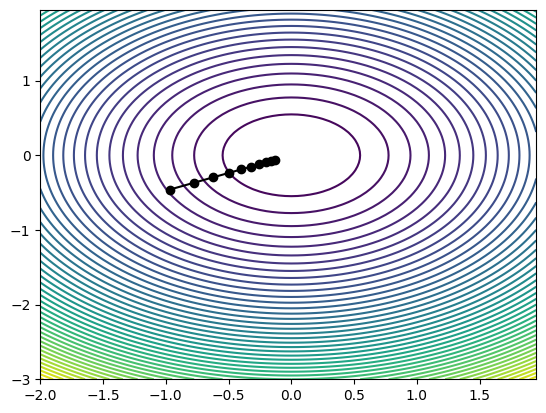

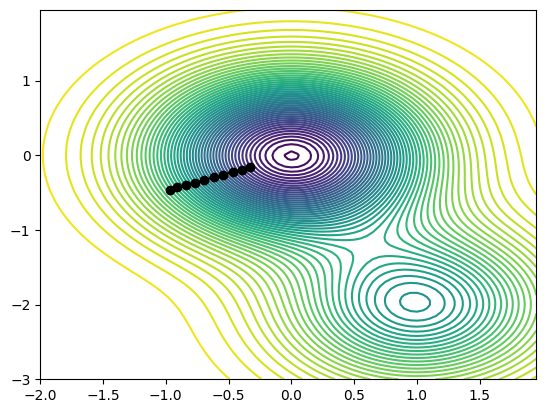

In [10]:
optimizer1 = SimpleGradientDescent(lambda x, y: x**2 + y**2, gradient1, 0.1)
optimizer2 = SimpleGradientDescent(lambda x, y: 1.5-np.exp(-x**(2)-y**(2))-0.5*np.exp(-(x-1)**(2)-(y+2)**(2)), gradient2, 0.1)


optimizer1.minimize(x1_init, x2_init, num_of_steps, verbose, plot)
plt.show()
optimizer2.minimize(x1_init, x2_init, num_of_steps, verbose, plot)
plt.show()

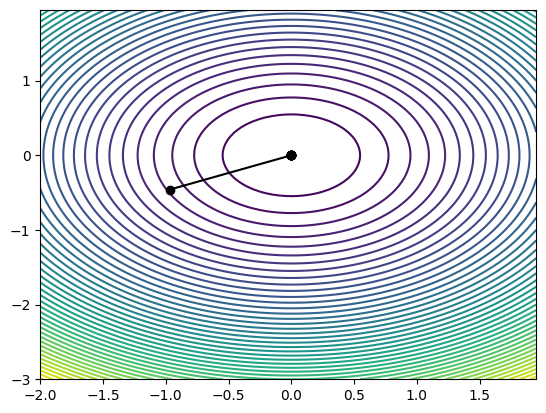

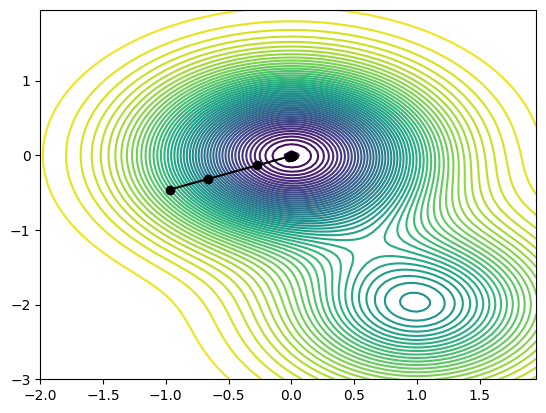

In [8]:
optimizer1 = SimpleGradientDescent(lambda x, y: x**2 + y**2, gradient1, 0.5)
optimizer2 = SimpleGradientDescent(lambda x, y: 1.5-np.exp(-x**(2)-y**(2))-0.5*np.exp(-(x-1)**(2)-(y+2)**(2)), gradient2, 0.5)

optimizer1.minimize(x1_init, x2_init, num_of_steps, verbose, plot)
plt.show()
optimizer2.minimize(x1_init, x2_init, num_of_steps, verbose, plot)
plt.show()

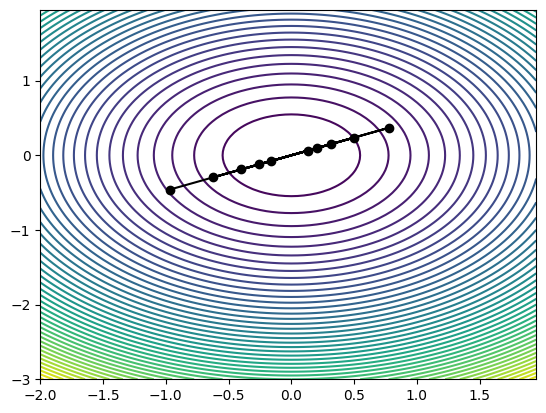

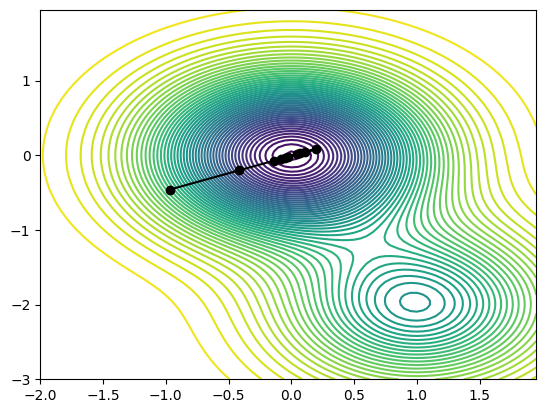

In [9]:
optimizer1 = SimpleGradientDescent(lambda x, y: x**2 + y**2, gradient1, 0.9)
optimizer2 = SimpleGradientDescent(lambda x, y: 1.5-np.exp(-x**(2)-y**(2))-0.5*np.exp(-(x-1)**(2)-(y+2)**(2)), gradient2, 0.9)

optimizer1.minimize(x1_init, x2_init, num_of_steps, verbose, plot)
plt.show()
optimizer2.minimize(x1_init, x2_init, num_of_steps, verbose, plot)
plt.show()

Jak widać na powyższych wykresach rozmiar kroku oznaczonego jako optimizer.alpha ma duże znaczenie jeżeli chodzi o przeszukiwanie metodą gradientu prostego. Zbyt mały krok znacznie spowalnia algorytm i zmusza do wykonania większej ilości kroków. Za to zbyt duży krok może nawet uniemożliwić trafienie w minimum funkcji poprzez "przeskoczenie" nad nim - dobrze to widać w trzecim zestawie wykresów.